
# Metrics

## Data

### Close value

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn, DefectsSource, DefectsScale
from metrics.utils import MetricLevel, print_relation_results

time_series_start = 0
time_series_end = 300
stock = StockMarketSeries("Adobe", "../data/adobe.csv", time_series_start, time_series_end,
                          all_noises_strength={DefectsScale.SLIGHTLY: 0.7,
                                               DefectsScale.MODERATELY: 3.0,
                                               DefectsScale.HIGHLY: 7.0},
                          all_incomplete_parts={DefectsScale.SLIGHTLY: 0.05,
                                                DefectsScale.MODERATELY: 0.12,
                                                DefectsScale.HIGHLY: 0.3},
                          partially_noised_strength={SeriesColumn.CLOSE: {DefectsScale.SLIGHTLY: 0.6,
                                                                          DefectsScale.MODERATELY: 2.0,
                                                                          DefectsScale.HIGHLY: 6.0},
                                                     SeriesColumn.OPEN: {DefectsScale.SLIGHTLY: 0.4,
                                                                         DefectsScale.MODERATELY: 1.7,
                                                                         DefectsScale.HIGHLY: 5.2}},
                          partially_incomplete_parts={SeriesColumn.CLOSE: {DefectsScale.SLIGHTLY: 0.05,
                                                                           DefectsScale.MODERATELY: 0.12,
                                                                           DefectsScale.HIGHLY: 0.3},
                                                      SeriesColumn.OPEN: {DefectsScale.SLIGHTLY: 0.05,
                                                                          DefectsScale.MODERATELY: 0.12,
                                                                          DefectsScale.HIGHLY: 0.3}})

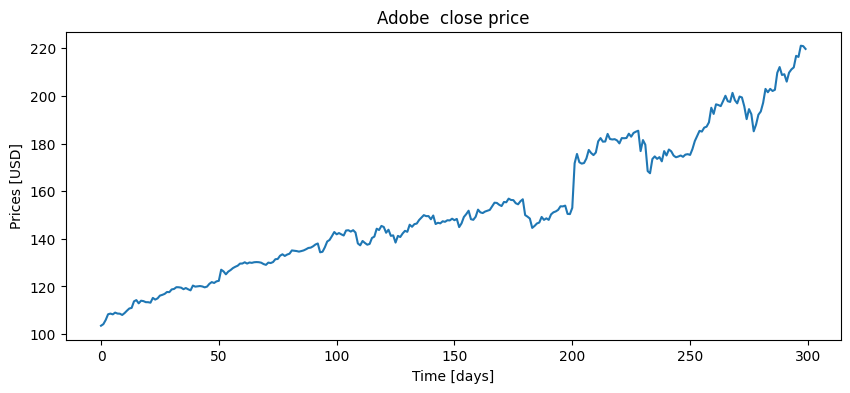

In [2]:
stock.plot_single_series(stock.real_series[SeriesColumn.CLOSE], SeriesColumn.CLOSE)

### Other values

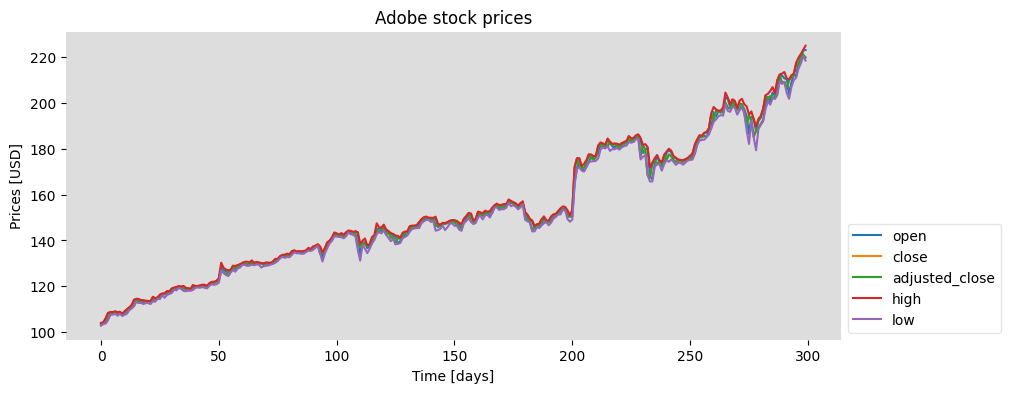

In [3]:
stock.plot_multiple_series("stock prices",
                           open=stock.real_series[SeriesColumn.OPEN],
                           close=stock.real_series[SeriesColumn.CLOSE],
                           adjusted_close=stock.real_series[SeriesColumn.ADJ_CLOSE],
                           high=stock.real_series[SeriesColumn.HIGH],
                           low=stock.real_series[SeriesColumn.LOW])

## Correctness metric

### Show noise

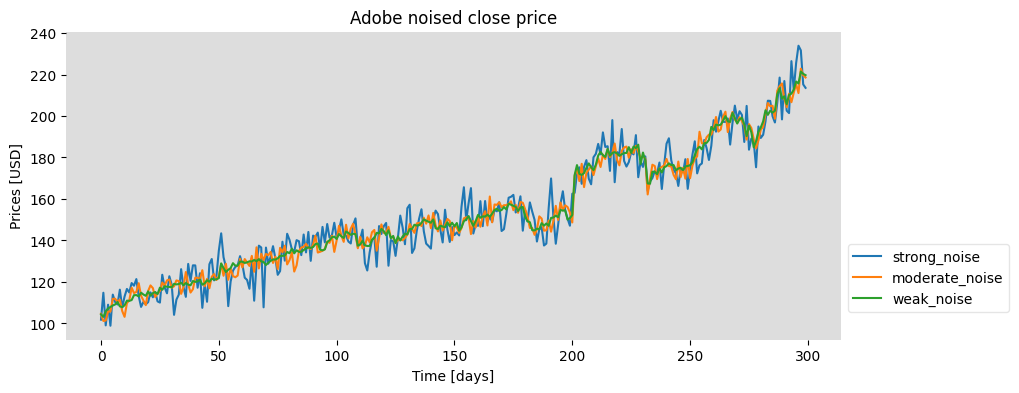

In [4]:
stock.plot_multiple_series("noised close price",
                           strong_noise=stock.all_defected_series[DefectsSource.NOISE][DefectsScale.HIGHLY][
                               SeriesColumn.CLOSE],
                           moderate_noise=stock.all_defected_series[DefectsSource.NOISE][DefectsScale.MODERATELY][
                               SeriesColumn.CLOSE],
                           weak_noise=stock.all_defected_series[DefectsSource.NOISE][DefectsScale.SLIGHTLY][
                               SeriesColumn.CLOSE])

### Heinrich's correctness metric on values

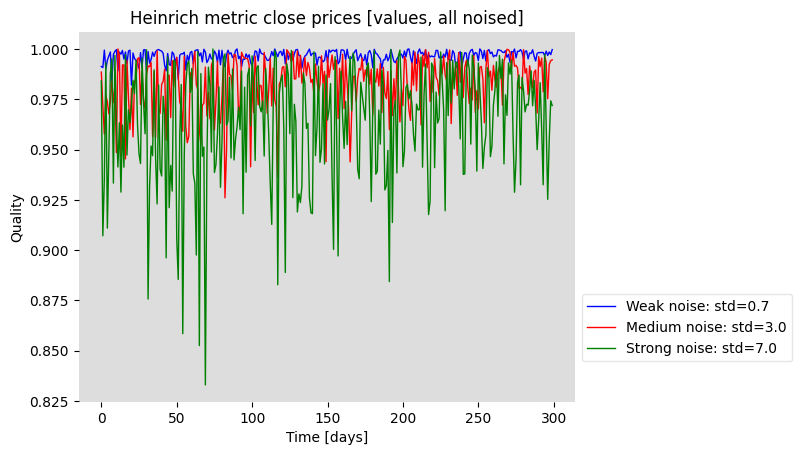

In [5]:
from correctness import HeinrichCorrectnessMetric
from timeseries.utils import DefectionRange

heinrich = HeinrichCorrectnessMetric(stock,
                                     alpha={SeriesColumn.OPEN: 1.6,
                                            SeriesColumn.CLOSE: 2.1,
                                            SeriesColumn.ADJ_CLOSE: 1.7,
                                            SeriesColumn.HIGH: 2.0,
                                            SeriesColumn.LOW: 2.3,
                                            SeriesColumn.VOLUME: 3.1})

qualities = heinrich.values_qualities(SeriesColumn.CLOSE, is_alpha=False)
heinrich.draw_heinrich_qualities(qualities, MetricLevel.VALUES, is_alpha=False,
                                 column_name=SeriesColumn.CLOSE)

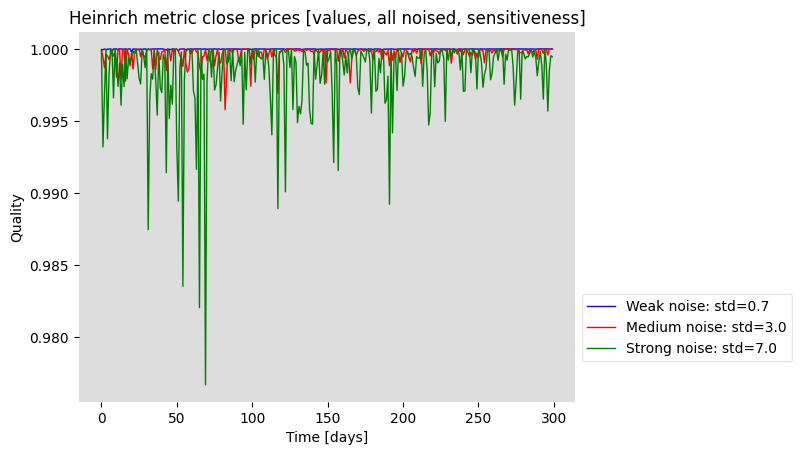

In [6]:
qualities = heinrich.values_qualities(SeriesColumn.CLOSE, is_alpha=True)
heinrich.draw_heinrich_qualities(qualities, MetricLevel.VALUES, is_alpha=True,
                                 column_name=SeriesColumn.CLOSE)

### Heinrich's correctness metric on tuples - all fields noised

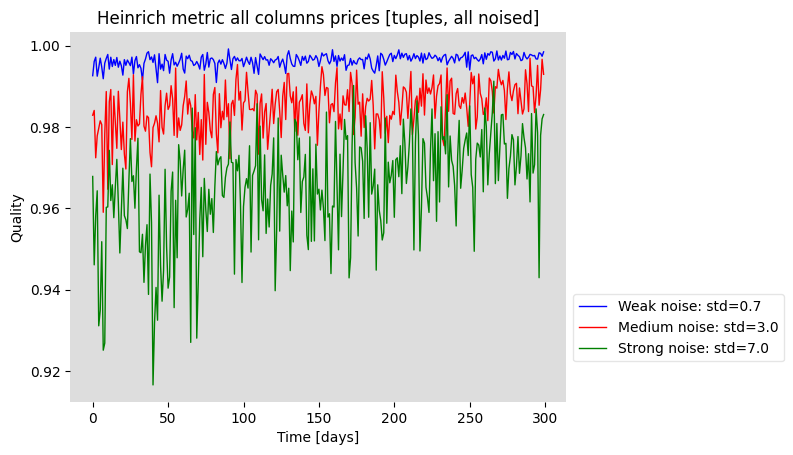

In [7]:
adobe_tuple_weights = [0.2, 0.2, 0.25, 0.15, 0.15, 0.05]

qualities = heinrich.tuples_qualities(adobe_tuple_weights, DefectionRange.ALL, is_alpha=False)
heinrich.draw_heinrich_qualities(qualities, MetricLevel.TUPLES, is_alpha=False, noise_range=DefectionRange.ALL)

### Heinrich's correctness metric on tuples - some fields noised

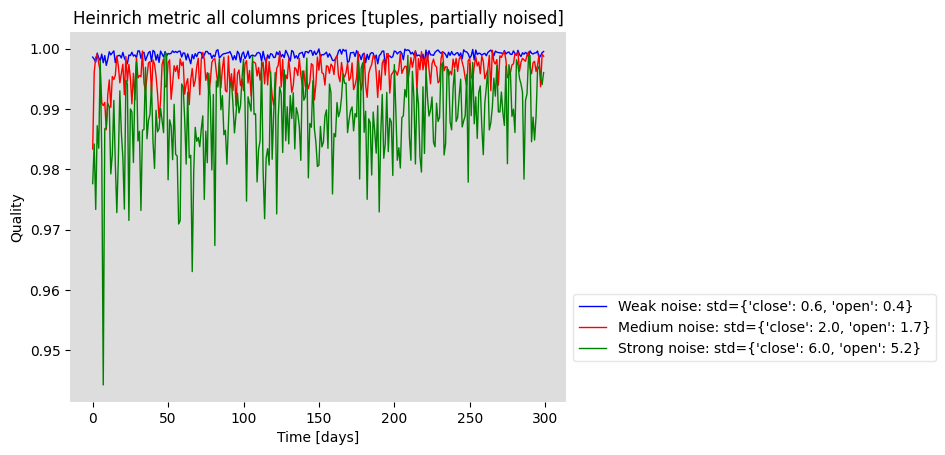

In [8]:
qualities = heinrich.tuples_qualities(adobe_tuple_weights, DefectionRange.PARTIAL, is_alpha=False)
heinrich.draw_heinrich_qualities(qualities, MetricLevel.TUPLES, is_alpha=False, noise_range=DefectionRange.PARTIAL)

### Heinrich's correctness metric on relation

In [9]:
qualities = heinrich.relation_qualities(adobe_tuple_weights, is_alpha=False)

print_relation_results(qualities, DefectsSource.NOISE, DefectionRange.ALL)

Relation quality differences due to different noise levels of all fields
Quality slightly noised): 0.9964508881250737
Quality moderately noised): 0.9850199950214465
Quality highly noised): 0.9652945651232746


In [10]:
qualities = heinrich.relation_qualities(adobe_tuple_weights, DefectionRange.PARTIAL, is_alpha=False)

print_relation_results(qualities, DefectsSource.NOISE, DefectionRange.PARTIAL)

Relation quality differences due to different noise levels of some fields
Quality slightly noised): 0.99899125440525
Quality moderately noised): 0.996044720269767
Quality highly noised): 0.987973827678609


## Completeness metrics

### Show incompleteness

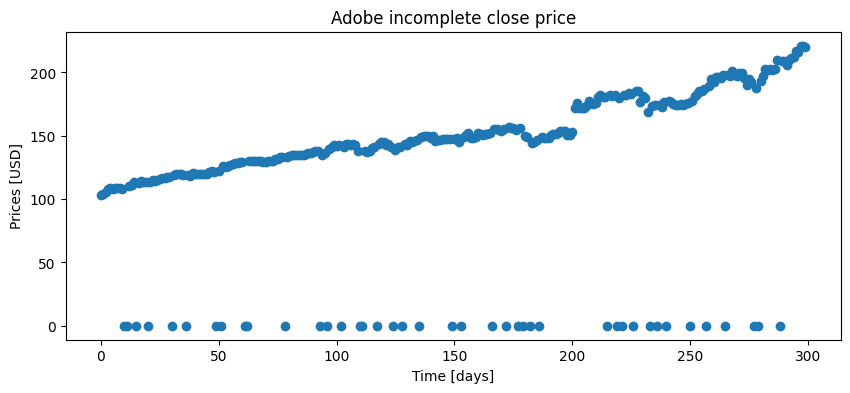

In [11]:
adobe_close_incomplete = stock.all_defected_series[DefectsSource.INCOMPLETENESS][DefectsScale.MODERATELY][
    SeriesColumn.CLOSE]
stock.plot_single_series(adobe_close_incomplete, SeriesColumn.CLOSE, defection="incomplete", plot_type="o")

### Blake's completeness metric on values

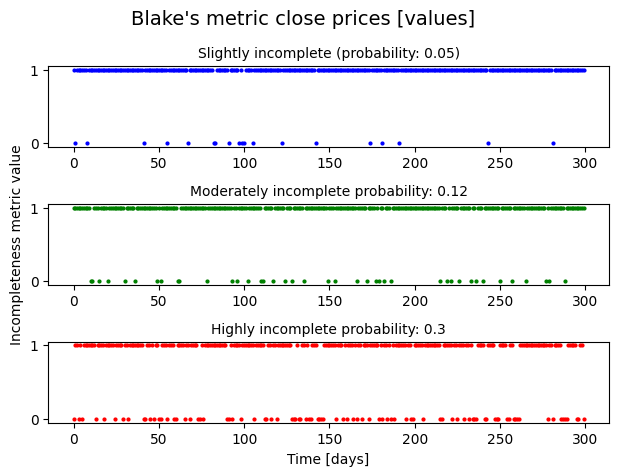

In [12]:
from metrics.completeness import BlakeCompletenessMetric

blake = BlakeCompletenessMetric(stock)
qualities = blake.values_qualities(SeriesColumn.CLOSE)
blake.draw_blake(qualities, MetricLevel.VALUES, column_name=SeriesColumn.CLOSE)

### Blake's completeness metric on tuples - all columns affected

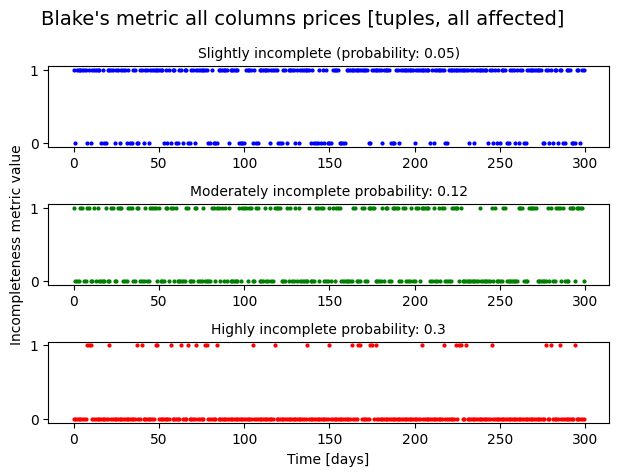

In [13]:
qualities = blake.tuples_qualities(incompleteness_range=DefectionRange.ALL)
blake.draw_blake(qualities, MetricLevel.TUPLES, incompleteness_range=DefectionRange.ALL)

### Blake's completeness metric on tuples - some columns affected

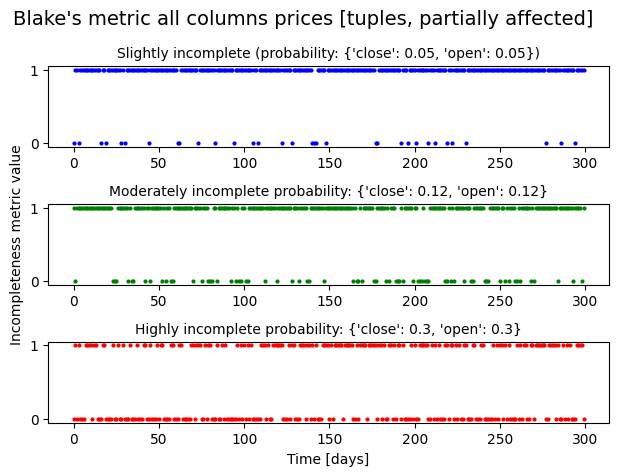

In [14]:
qualities = blake.tuples_qualities(incompleteness_range=DefectionRange.PARTIAL)
blake.draw_blake(qualities, MetricLevel.TUPLES, incompleteness_range=DefectionRange.PARTIAL)

### Blake's completeness metric on relation

In [15]:
qualities = blake.relation_qualities(incompleteness_range=DefectionRange.ALL)

print_relation_results(qualities, DefectsSource.INCOMPLETENESS, DefectionRange.ALL)

Relation quality differences due to different incompleteness levels of all fields
Quality slightly noised): 0.6933333333333334
Quality moderately noised): 0.43000000000000005
Quality highly noised): 0.12


In [16]:
qualities = blake.relation_qualities(incompleteness_range=DefectionRange.PARTIAL)

print_relation_results(qualities, DefectsSource.INCOMPLETENESS, DefectionRange.PARTIAL)

Relation quality differences due to different incompleteness levels of some fields
Quality slightly noised): 0.89
Quality moderately noised): 0.76
Quality highly noised): 0.49
